In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

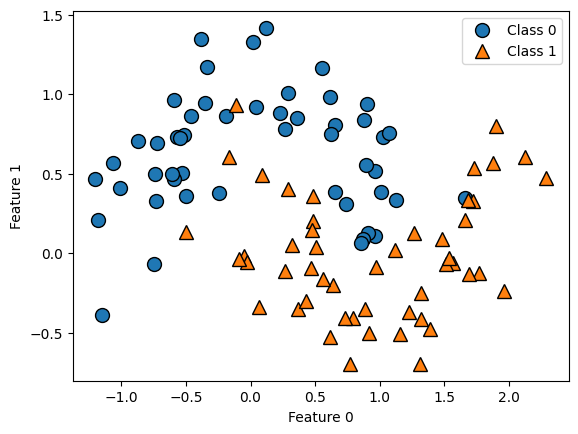

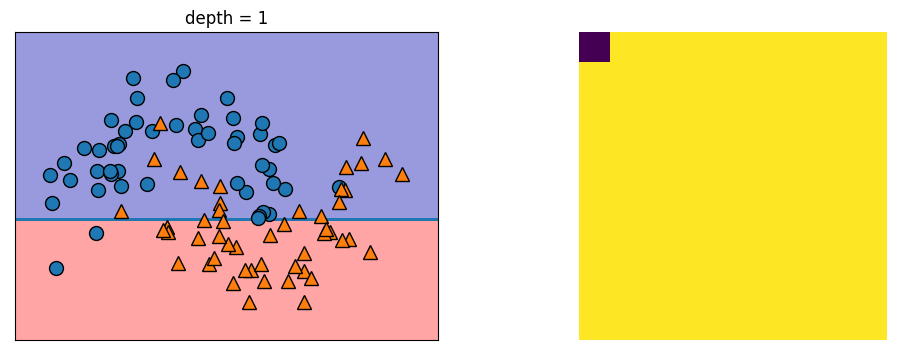

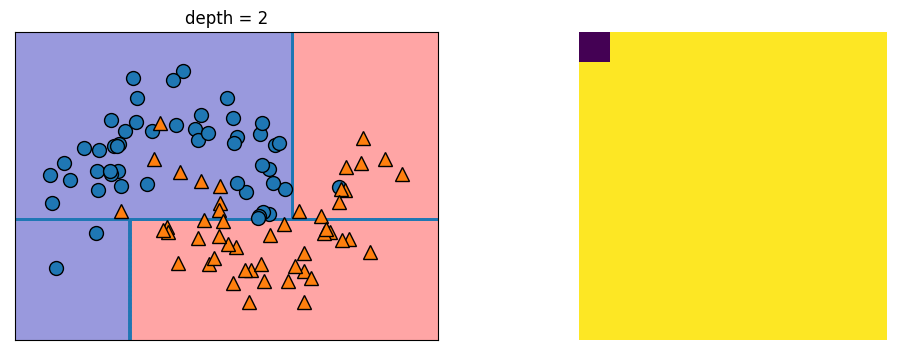

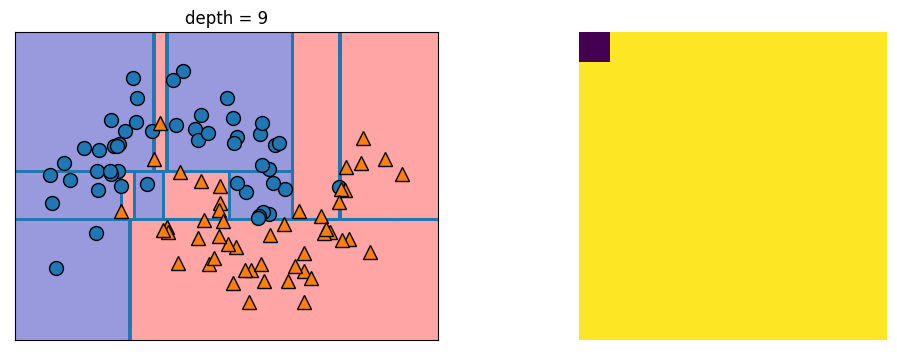

In [2]:
mglearn.plots.plot_tree_progressive()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Training Set Accuracy:{:.3f}".format(tree.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(tree.score(X_test,y_test)))

Training Set Accuracy:1.000
Test Set Accuracy:0.937


In [4]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Training Set Accuracy:{:.3f}".format(tree.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(tree.score(X_test,y_test)))

Training Set Accuracy:0.988
Test Set Accuracy:0.951


In [5]:
print("Feature Importance :\n{}".format(tree.feature_importances_))

Feature Importance :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


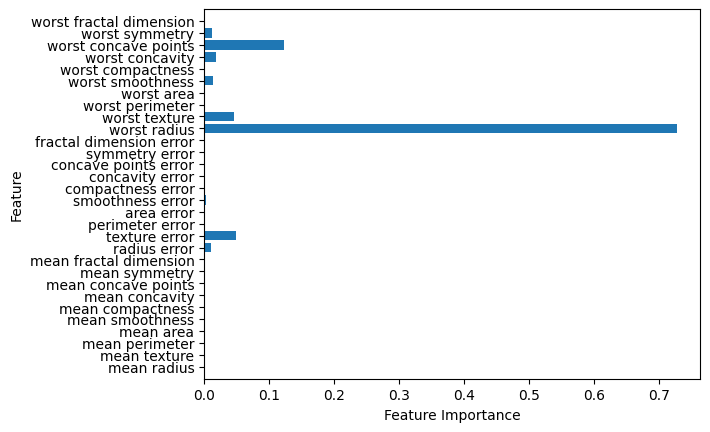

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Text(0, 0.5, 'Prices ($/Mbyte)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


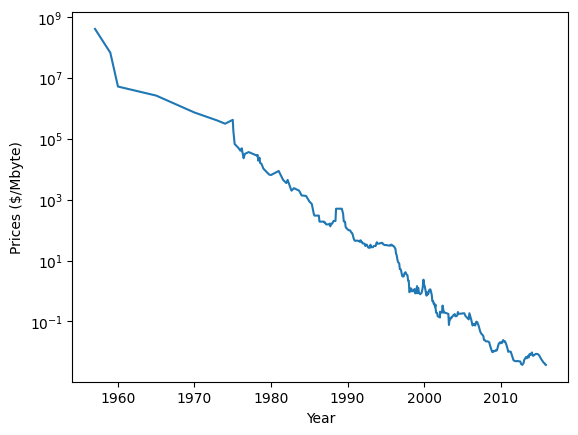

In [7]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Prices ($/Mbyte)")

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/tmp/ipykernel_51304/645353606.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]
/tmp/ipykernel_51304/645353606.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:,np.newaxis]


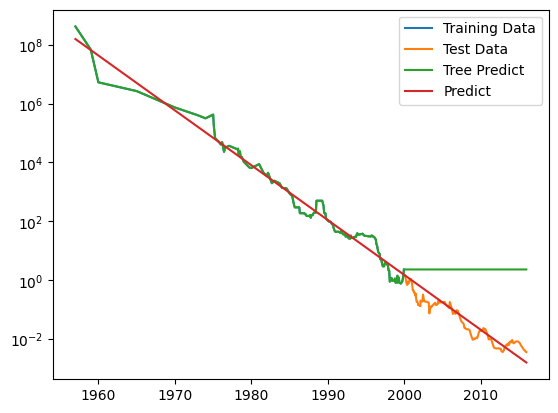

In [9]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Predict")
plt.semilogy(ram_prices.date, price_lr, label="Predict")
plt.legend()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

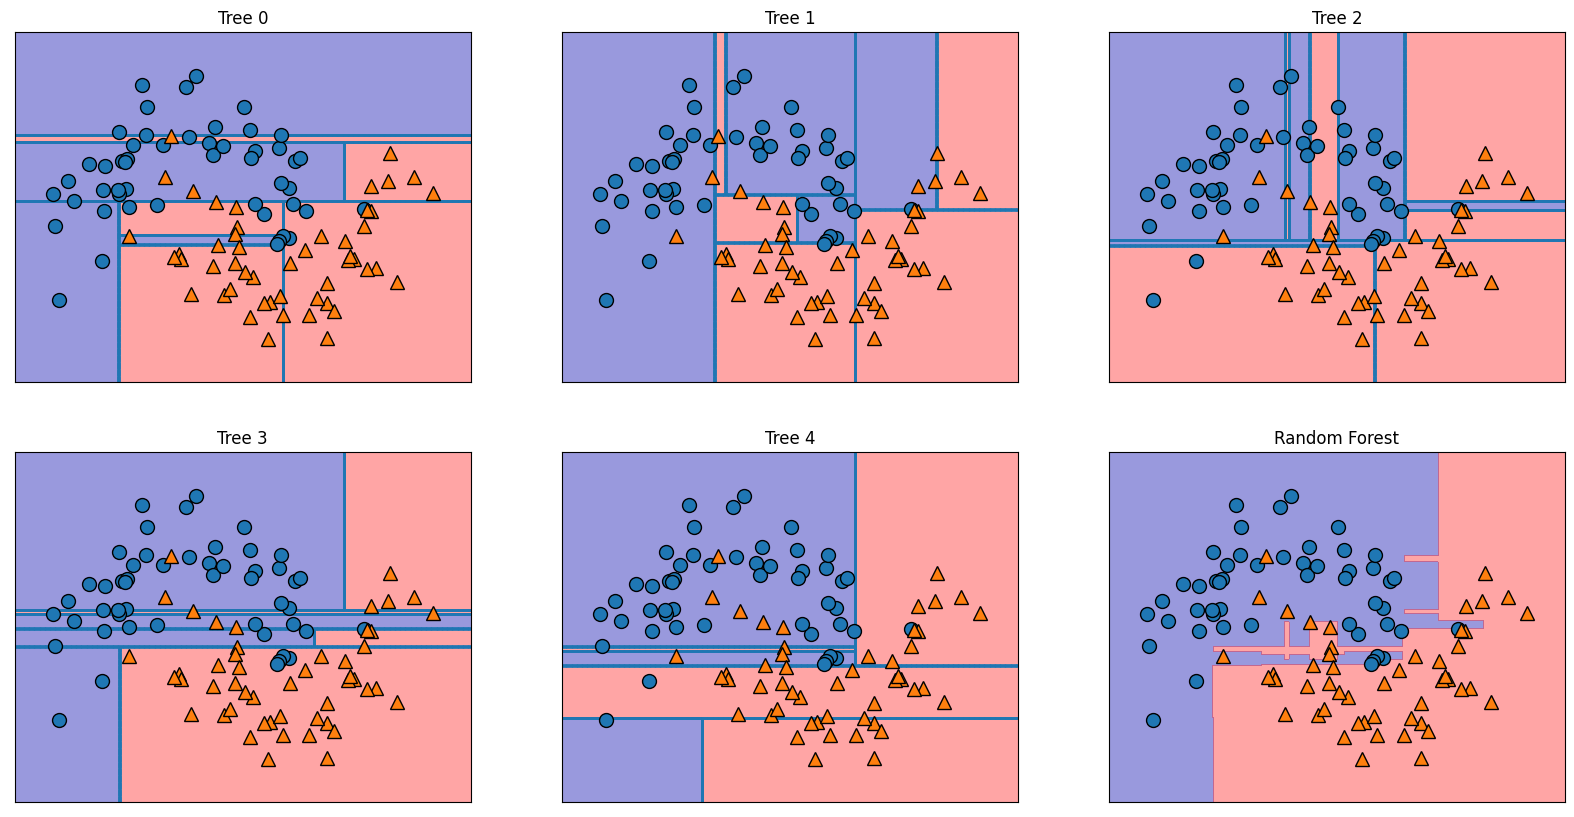

In [11]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("Training Set Accuracy : {:.3f}".format(forest.score(X_train,y_train)))
print("Test Set Accuracy : {:.3f}".format(forest.score(X_test,y_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.972


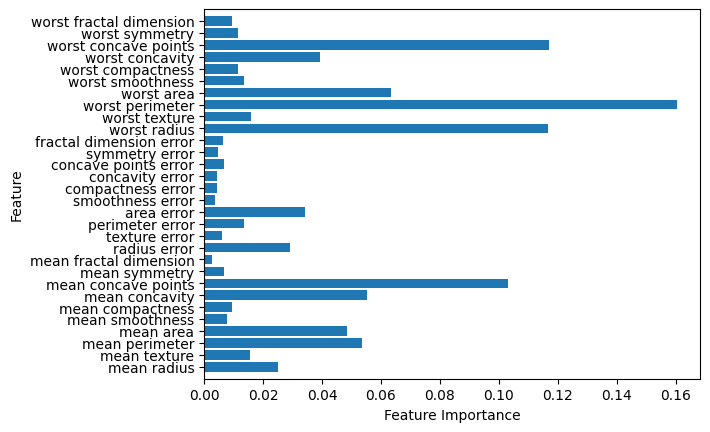

In [13]:
plot_feature_importances_cancer(forest)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print("Training Set Accuracy:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(gbrt.score(X_test,y_test)))

Training Set Accuracy:1.000
Test Set Accuracy:0.965


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("Training Set Accuracy:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(gbrt.score(X_test,y_test)))

Training Set Accuracy:0.991
Test Set Accuracy:0.972


In [16]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Training Set Accuracy:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(gbrt.score(X_test,y_test)))

Training Set Accuracy:0.988
Test Set Accuracy:0.965


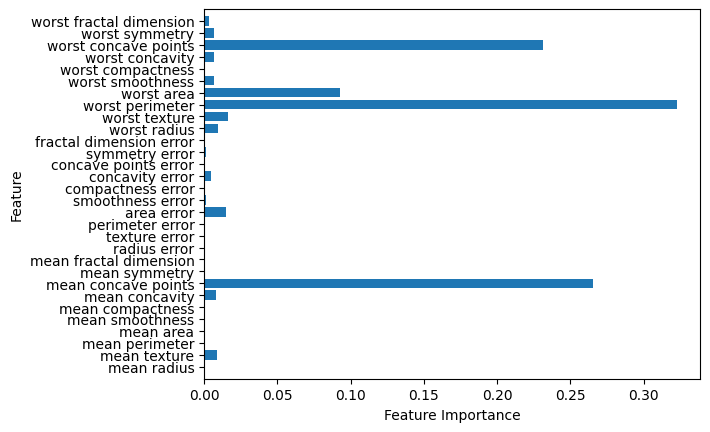

In [17]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

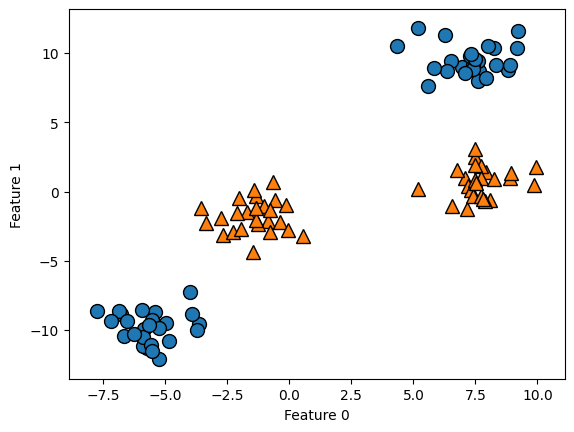

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/home/lee/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

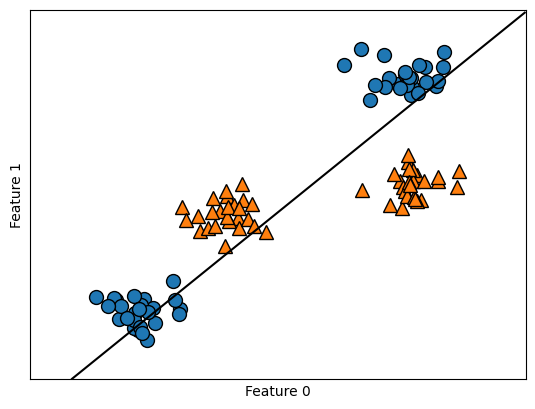

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/tmp/ipykernel_51304/2183429355.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'Feature 1 ** 2')

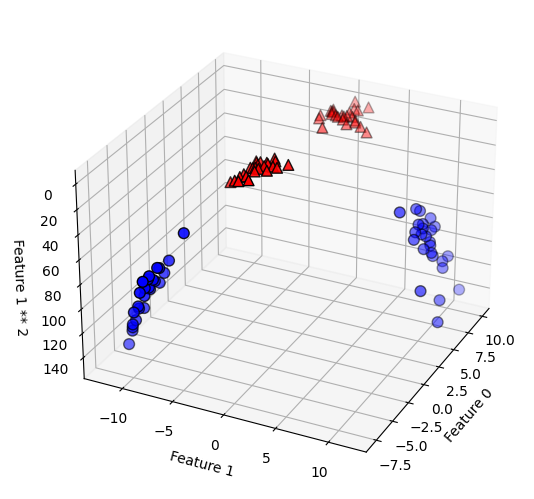

In [20]:
X_new = np.hstack([X, X[:,1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

/home/lee/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_51304/2913239242.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'Feature 1 ** 2')

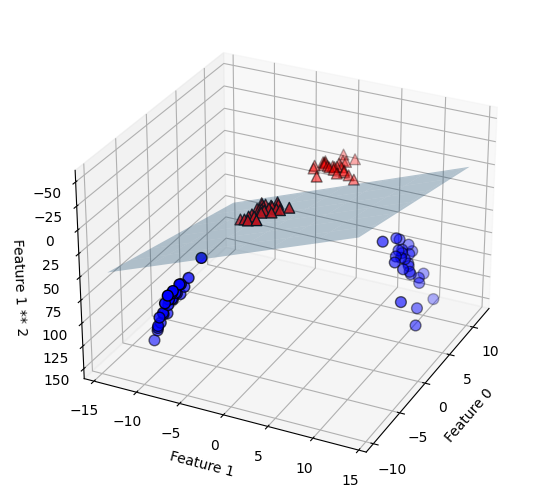

In [21]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() +2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() +2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8, alpha =0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0, 0.5, 'Feature 1')

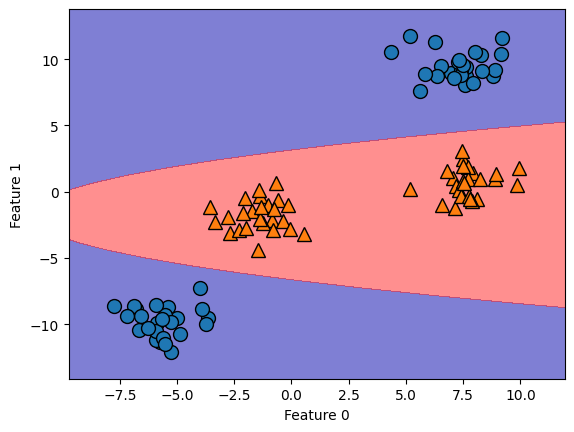

In [22]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha =0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

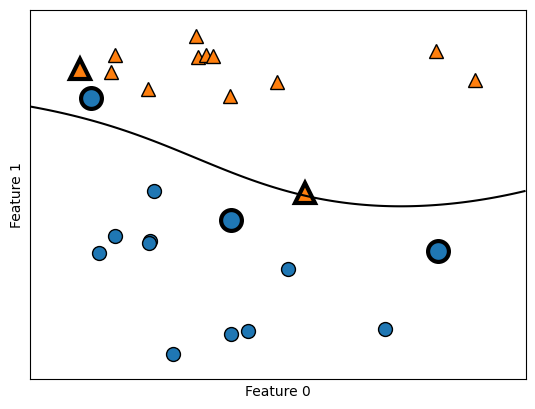

In [23]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv= svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

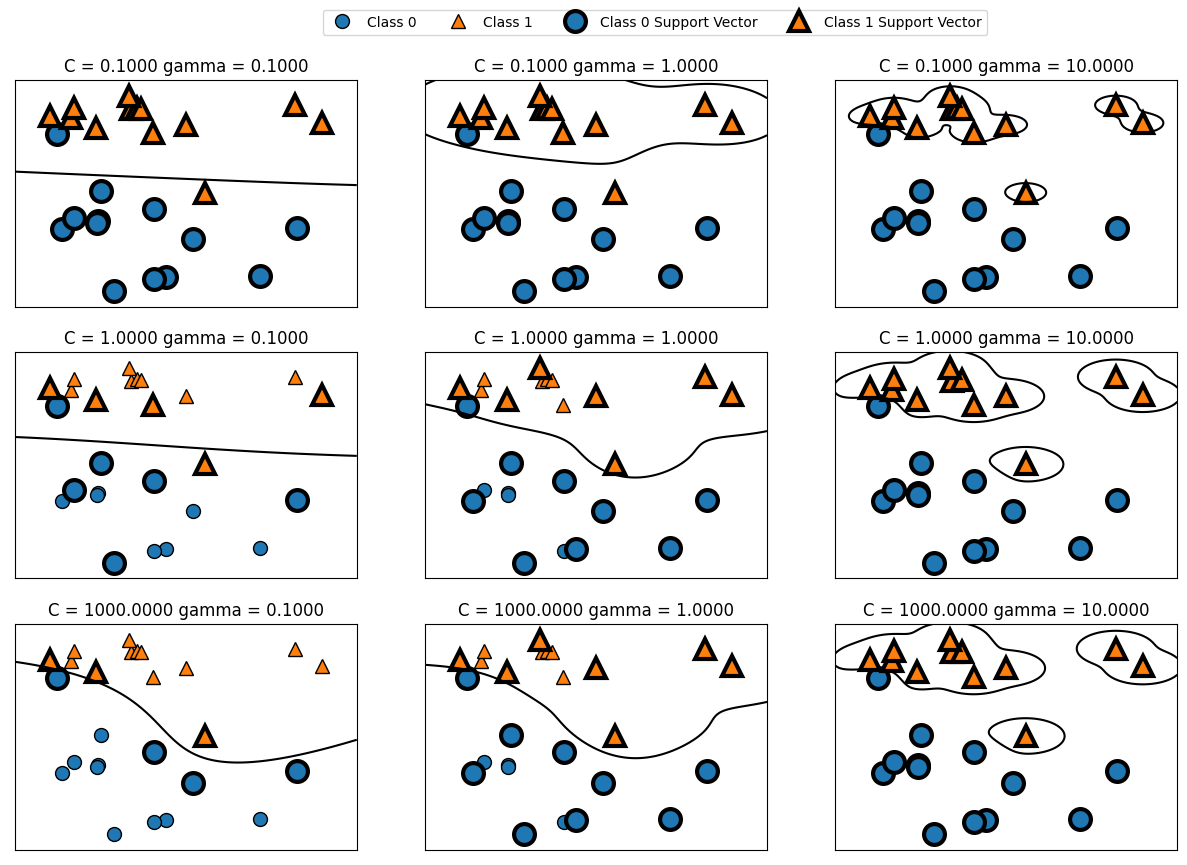

In [24]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma=gamma, ax =a)
axes[0,0].legend(["Class 0","Class 1","Class 0 Support Vector", "Class 1 Support Vector"], ncol=4, loc=(.9,1.2))

Text(0, 0.5, 'Feature Size')

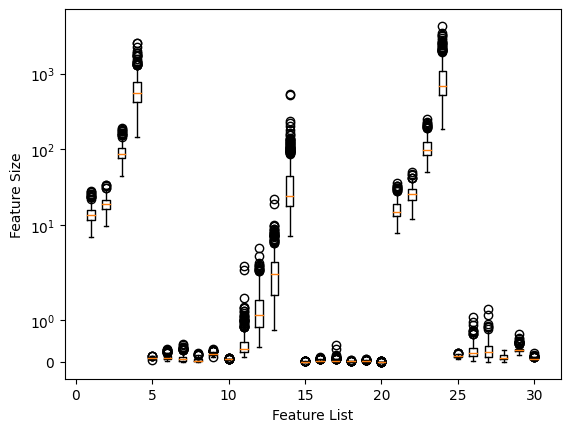

In [25]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature List")
plt.ylabel("Feature Size")

In [26]:
svc = SVC(C=1000)
svc.fit(X_train,y_train)
print("Training Set Accuracy:{:.3f}".format(svc.score(X_train,y_train)))
print("Test Set Accuracy:{:.3f}".format(svc.score(X_test,y_test)))

Training Set Accuracy:0.958
Test Set Accuracy:0.951


Text(0, 0.5, 'relu(x), tanh(x)')

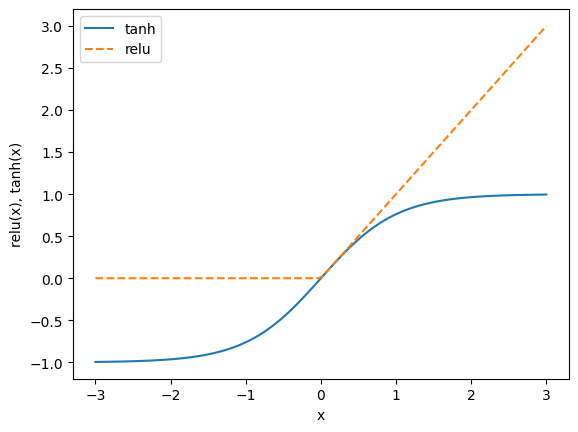

In [27]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line,0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, '특성 1')

/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


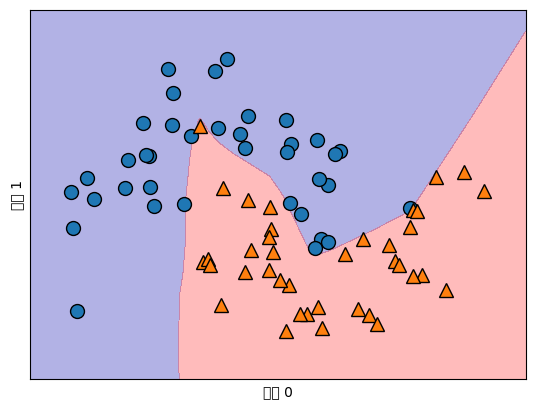

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

/home/lee/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


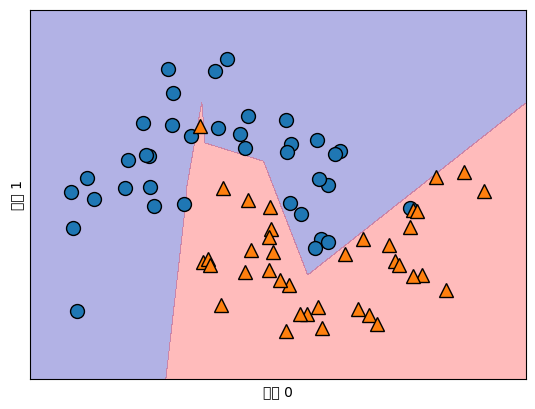

In [29]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


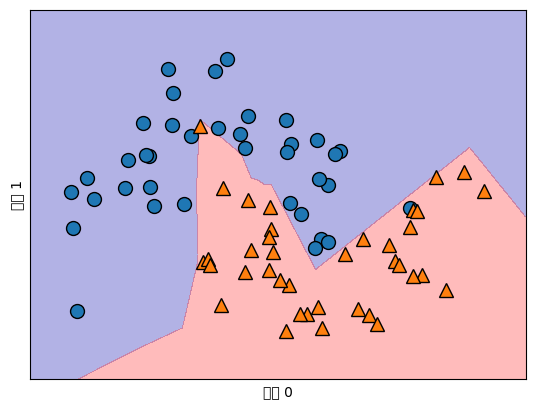

In [30]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,

hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

/home/lee/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lee/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


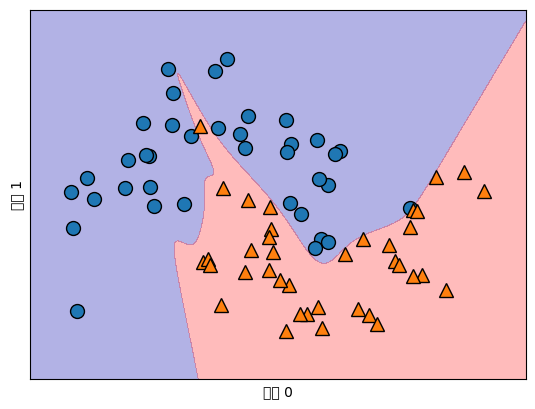

In [31]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

/home/lee/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/lee/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


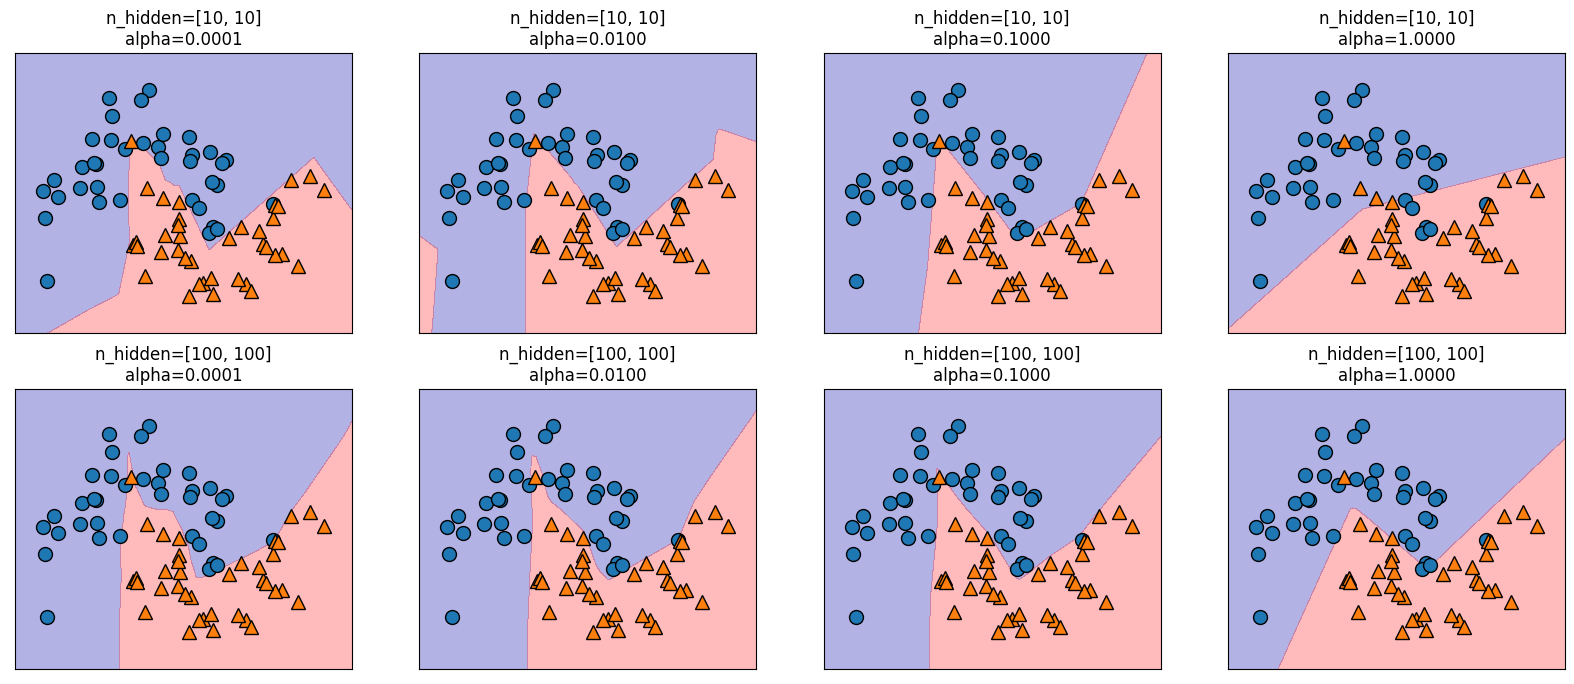

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

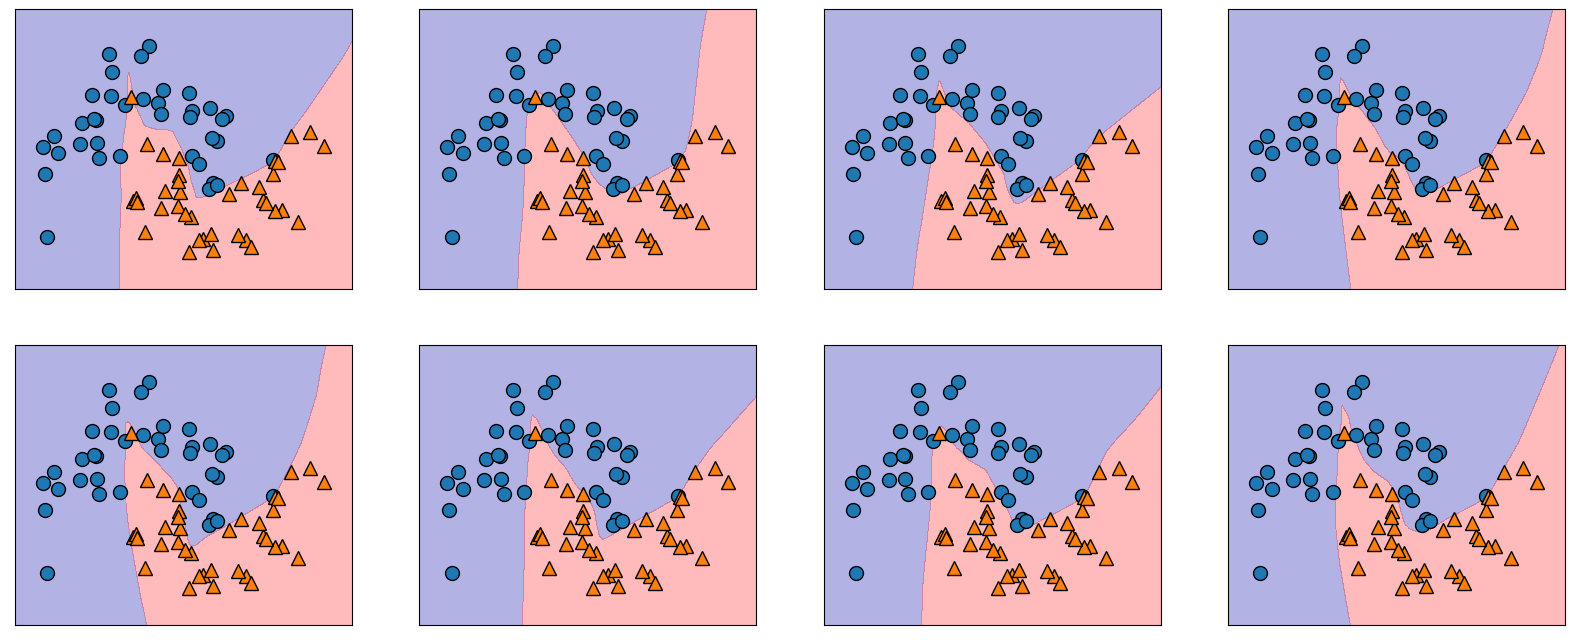

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)